In [1]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl 
import pylab
from sklearn.metrics import r2_score

In [2]:
def get_data(file_name):
    inputfile = open(file_name, "r+")
    row_1_data = []
    row_2_data = []
    for i in range(3):
        inputfile.readline()  # use next() if 2.7. Skip the first few samples
    for line in inputfile:
        splits = line.split(",")
        row_1_data.append(float(splits[0]))
        row_2_data.append(float(splits[1]))
    return row_1_data, row_2_data

def get_data_intensity(file_name):
    inputfile = open(file_name, "r+")
    row_1_data = []
    row_2_data = []
    row_3_data = []
    for i in range(3):
        inputfile.readline()  # use next() if 2.7. Skip the first few samples
    for line in inputfile:
        splits = line.split(",")
        row_1_data.append(float(splits[0]))
        row_2_data.append(float(splits[1]))
        row_3_data.append(float(splits[2]))
    return row_1_data, row_2_data, row_3_data

In [28]:
# solve for a and b
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum(xi*yi for xi,yi in zip(X, Y)) - n * xbar * ybar
    denum = sum(xi**2 for xi in X) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.10f} + {:.10f}x'.format(a, b))

    return a, b

def plot_android_data(data_1, data_2, fileName):
    # adjust rcParams as needed to make your graph readable
    # plt.rcParams['figure.figsize'] = [10, 5]
    plt.title(fileName)
    plt.plot(np.arange(0, len(data_1), 1), data_1, label="accelerometerVectorData")
    plt.plot(np.arange(0, len(data_2), 1), data_2, label="smoothedAccelerometerVectorData")
    plt.legend(loc='lower right')
    plt.show()
    
def plot_ios_data(data_1, data_2, fileName):
    # adjust rcParams as needed to make your graph readable
    # plt.rcParams['figure.figsize'] = [10, 5]
    plt.title(fileName)
    plt.plot(np.arange(0, len(data_1), 1), data_1, label="accelerometerVectorData")
    plt.plot(np.arange(0, len(data_2), 1), data_2, label="smoothedAccelerometerVectorData")
    plt.legend(loc='lower right')
    plt.show()
    
def plot_intensity_data(data, fileName):
    # adjust rcParams as needed to make your graph readable
    # plt.rcParams['figure.figsize'] = [10, 5]
    plt.figure(figsize=(16, 8))
    plt.title(fileName)
    plt.plot(np.arange(0, len(data), 1), data)
    # plt.show()
    plt.savefig("./pngs/" + fileName + ".png", dpi=100)
    
def plot(x, y, fileName):
    z = np.polyfit(x, y, 1)  
    p = np.poly1d(z)
    pred = []
    for x_val in x:
        pred.append((z[0] * x_val) + z[1])
    r_squared = r2_score(y, pred)

    fig, ax = plt.subplots(figsize=(12, 8)) 
    ax.plot(x, y) 
    ax.set(xlabel='weight', ylabel='intensity', title=fileName) 
    ax.grid() 

    pylab.plot(x,p(x), "y--") 
    pl.plot(x, y, 'og-', label=("y=%.10fx+(%.6f) - $R^2$=%.6f"%(z[0],z[1], r_squared))) 
    pl.legend()
    pl.savefig("./pngs/" + fileName + ".png", dpi=100)

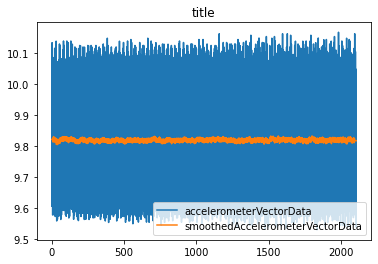

In [4]:
row_1_data, row_2_data = get_data("./Pixel5/calibration-102.csv")
plot_android_data(row_1_data, row_2_data, "title")
# np.arange(1, len(row_1_data) + 1, 1)

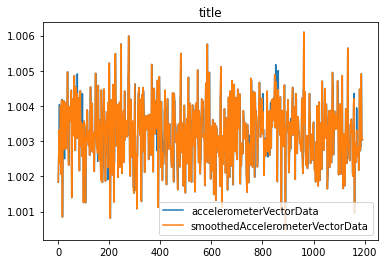

In [5]:
row_1_data, row_2_data = get_data("./iPhone-13/calibration-102.csv")
plot_ios_data(row_1_data, row_2_data, "title")

In [6]:
# plotting between weight vs intensity
weight = [0, 102, 240, 379, 658, 818]
pixel5 = [1.1275786, 0.20112291, 0.4217329, 0.16693163, 0.25922, 0.26112905]
iphonese = [0.00105870573629251, 0.000848538797201339, 0.000426434131039099, 0.000526392537816919, 0.000487689069711278, 0.000474837641938552]
iphone13 = [0.00111204040732095, 0.00064452523043304, 0.000645269724364158, 0.000601944611116786, 0.000737111879930166, 0.000588855628250445]

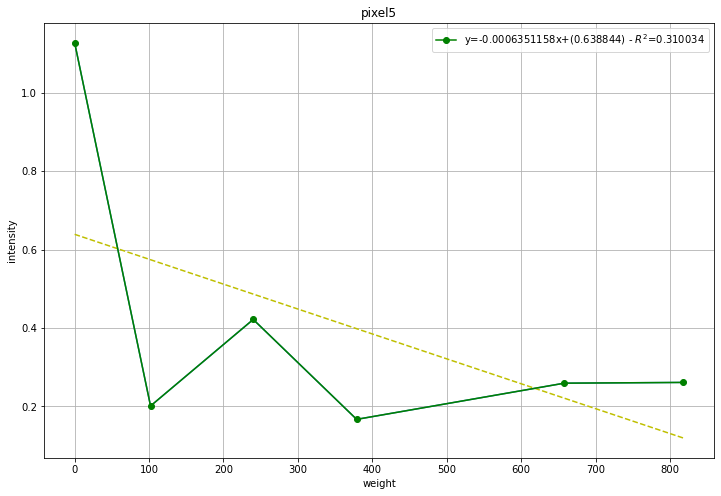

In [34]:
plot(weight, pixel5, "pixel5")

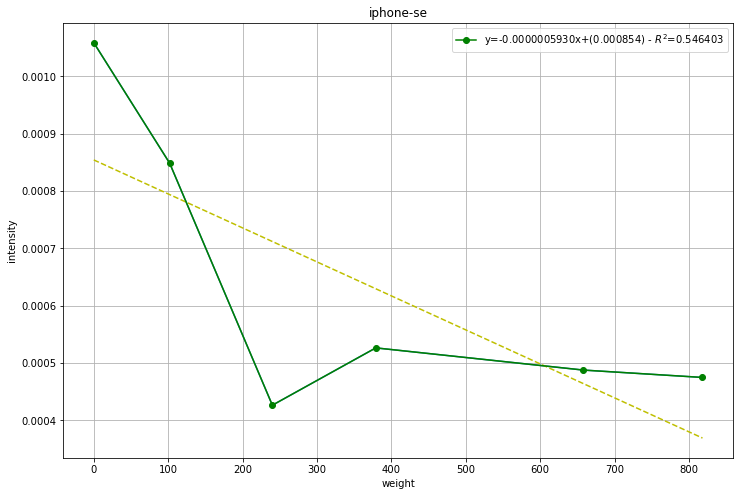

In [35]:
plot(weight, iphonese, "iphone-se")

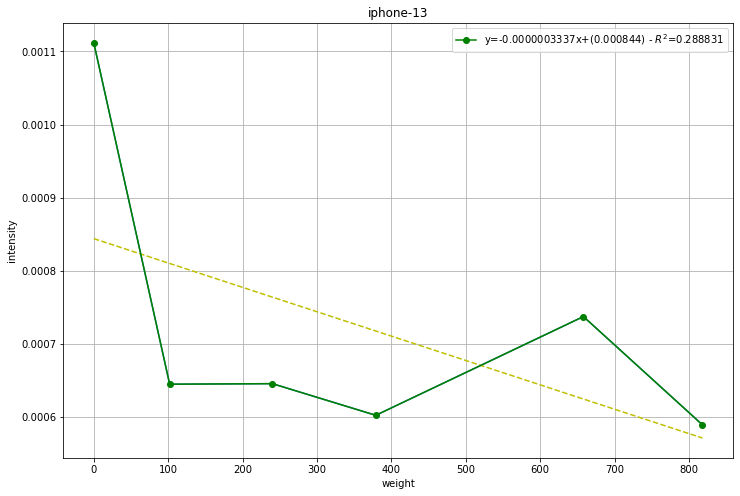

In [36]:
plot(weight, iphone13, "iphone-13")

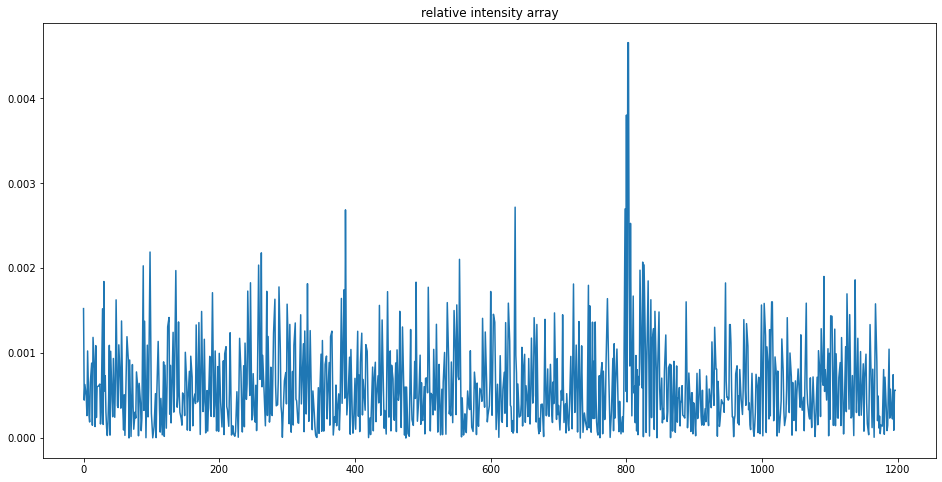

In [16]:
row_1_data, row_2_data, row_3_data = get_data_intensity("./iPhone-se/calibration_intensity.csv")
plot_intensity_data(row_3_data, "relative intensity array")

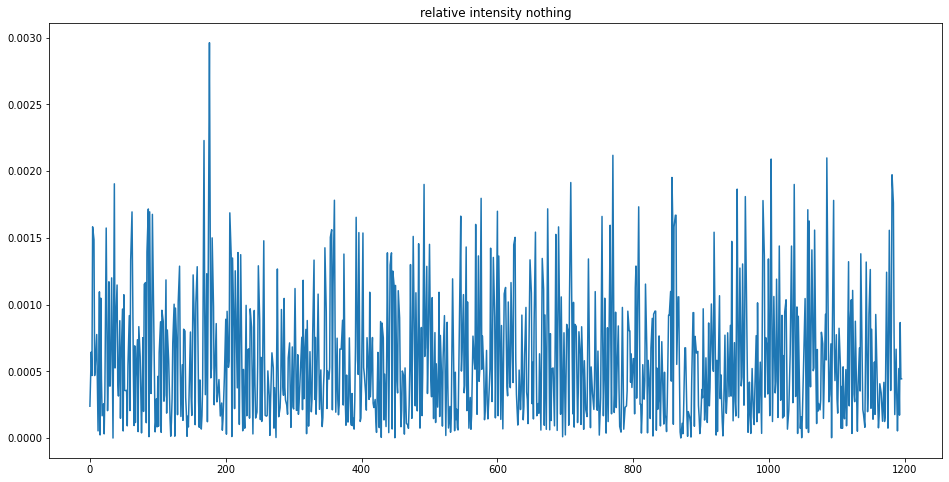

In [17]:
row_1_data, row_2_data, row_3_data = get_data_intensity("./comparison/calibration_nothing.csv")
plot_intensity_data(row_3_data, "relative intensity nothing")

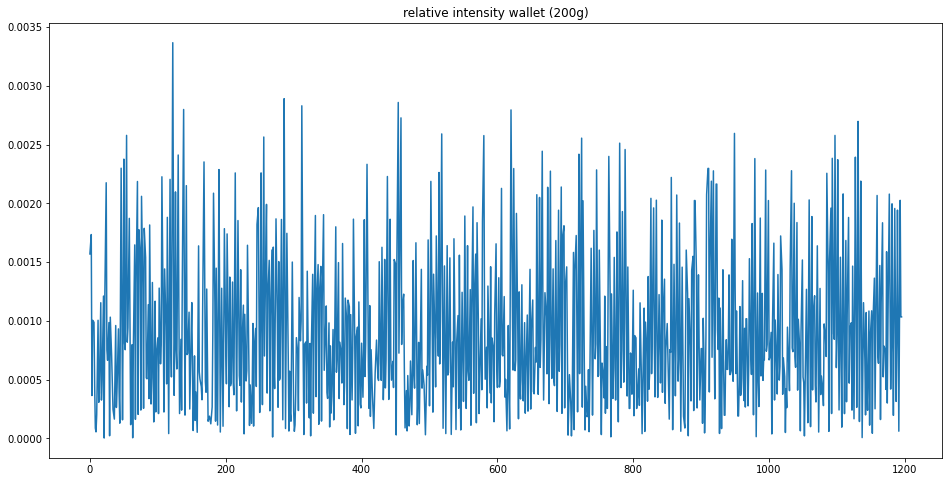

In [18]:
row_1_data, row_2_data, row_3_data = get_data_intensity("./comparison/calibration_wallet_200.csv")
plot_intensity_data(row_3_data, "relative intensity wallet (200g)") 

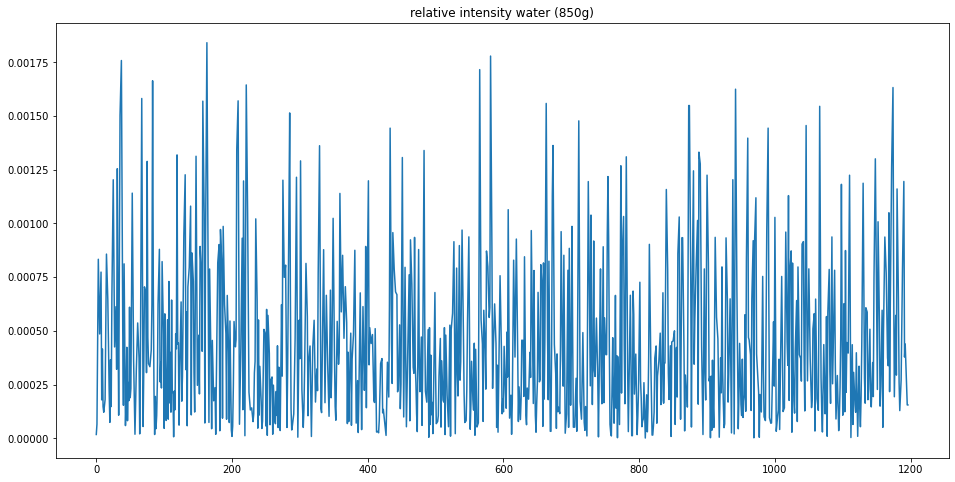

In [19]:
row_1_data, row_2_data, row_3_data = get_data_intensity("./comparison/calibration_water_850.csv")
plot_intensity_data(row_3_data, "relative intensity water (850g)") 